OutDir: .
Figure saved to Normal_MultHist.png


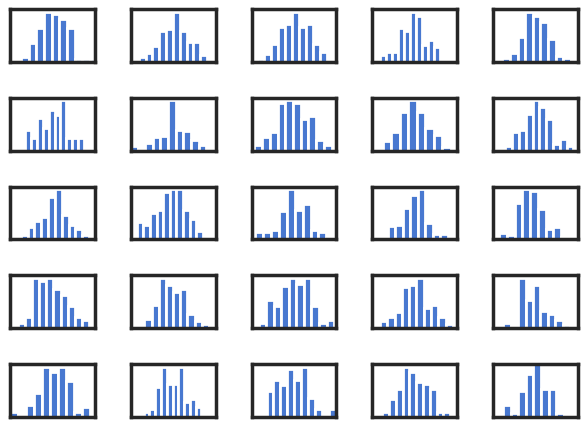

The standard error of the mean, with 100 samples, is 0.09789220359591091
OutDir: .
Figure saved to DistributionFunctions.png


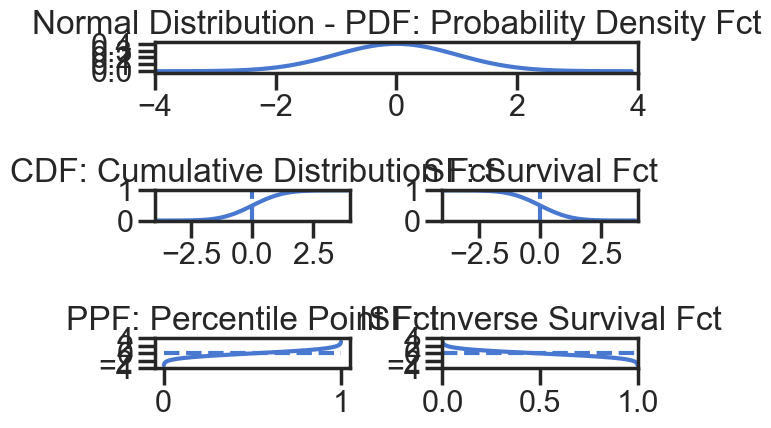

C:\Users\usuario\AppData\Local\Temp\ipykernel_6560\824793065.py:190: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bin_edges = np.histogram(data, bins=numbins, normed=True)


With a threshold of 2.00 you get 7%  of the data
To get 97.5% of the data you need a threshold of 8.92.


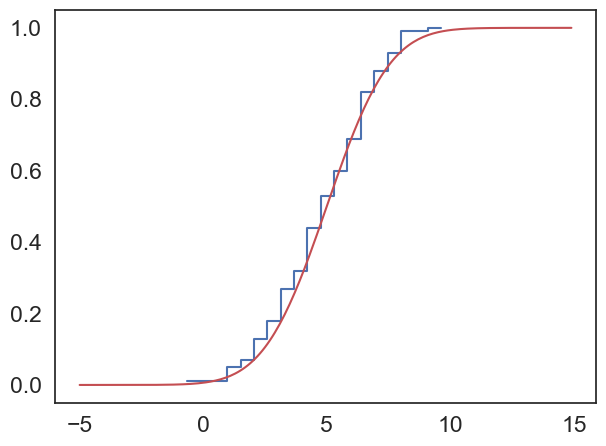

OutDir: .
Figure saved to Normal_Distribution_PDF.png


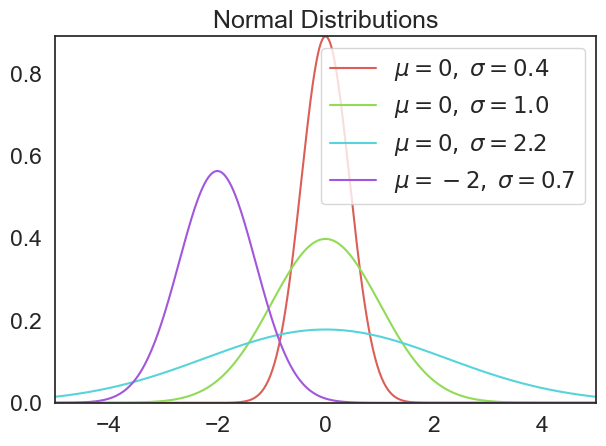

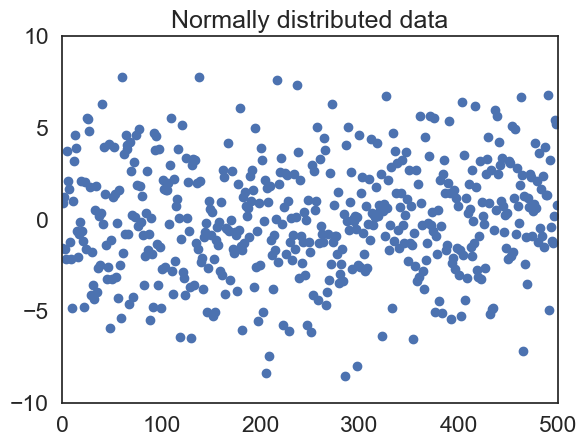

In [6]:
# Import standard packages
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

import sys
sys.path.append(os.path.join('..', '..', 'Utilities'))

try:
# Import formatting commands if directory "Utilities" is available
    from ISP_mystyle import showData

except ImportError:
# Ensure correct performance otherwise
    def showData(*options):
        plt.show()
        return

# General formatting options
sns.set(context='poster', style='ticks', palette='muted')


def simple_normal():
    """ Different aspects of a normal distribution"""

    # Generate the data
    x = np.arange(-4,4,0.1) # generate the desirded x-values
    x2 = np.arange(0,1,0.001)

    nd = stats.norm()   # First simply define the normal distribution;
                        # don't calculate any values yet


    # This is a more complex plot-layout: the first row
    # is taken up completely by the PDF
    ax = plt.subplot2grid((3,2),(0,0), colspan=2)

    plt.plot(x,nd.pdf(x))
    plt.xlim([-4,4])
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.gca().yaxis.set_ticks_position('left')
    plt.yticks(np.linspace(0, 0.4, 5))
    plt.title('Normal Distribution - PDF: Probability Density Fct')

    # CDF
    plt.subplot(323)
    plt.plot(x,nd.cdf(x))
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.gca().yaxis.set_ticks_position('left')
    plt.xlim([-4,4])
    plt.ylim([0,1])
    plt.vlines(0, 0, 1, linestyles='--')
    plt.title('CDF: Cumulative Distribution Fct')

    # SF
    plt.subplot(324)
    plt.plot(x,nd.sf(x))
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.gca().yaxis.set_ticks_position('left')
    plt.xlim([-4,4])
    plt.ylim([0,1])
    plt.vlines(0, 0, 1, linestyles='--')
    plt.title('SF: Survival Fct')

    # PPF
    plt.subplot(325)
    plt.plot(x2,nd.ppf(x2))
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.gca().yaxis.set_ticks_position('left')
    plt.yticks(np.linspace(-4,4,5))
    plt.hlines(0, 0, 1, linestyles='--')
    plt.ylim([-4,4])
    plt.title('PPF: Percentile Point Fct')

    # ISF
    plt.subplot(326)
    plt.plot(x2,nd.isf(x2))
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.gca().yaxis.set_ticks_position('left')
    plt.yticks(np.linspace(-4,4,5))
    plt.hlines(0, 0, 1, linestyles='--')
    plt.title('ISF: Inverse Survival Fct')
    plt.ylim([-4,4])
    plt.tight_layout()

    outFile = 'DistributionFunctions.png'
    showData(outFile)


def shifted_normal():
    """PDF and scatter plot"""

    # Plot 3 PDFs (Probability density functions) for normal distributions ---

    # Select 3 mean values, and 3 SDs
    myMean = [0,0,0,-2]
    mySD = [0.2,1,5,0.5]
    t = np.arange(-5,5,0.02)

    # Plot the 3 PDFs, using the color-palette "hls"
    with sns.color_palette('hls', 4):
        for mu,sigma in zip(myMean, np.sqrt(mySD)):
            y = stats.norm.pdf(t, mu, sigma)
            plt.plot(t, y,
                    label=f'$\mu={mu}, \; \t\sigma={sigma:3.1f}$')

    # Format the plot
    plt.legend()
    plt.xlim([-5,5])
    plt.title('Normal Distributions')

    # Show the plot, and save the out-file
    outFile = 'Normal_Distribution_PDF.png'
    showData(outFile)

    # Generate random numbers with a normal distribution ---------------------
    myMean = 0
    mySD = 3
    numData = 500
    data = stats.norm.rvs(myMean, mySD, size = numData)

    # Plot the data
    plt.scatter(np.arange(len(data)), data)

    # Format the plot
    plt.title('Normally distributed data')
    plt.xlim([0,500])
    plt.ylim([-10,10])
    plt.show()
    plt.close()

def values_fromCDF():
    """ Calculate an empirical cumulative distribution function, compare it
    with the exact one, and find the exact point for a specific data value. """

    # Generate normally distributed random data
    myMean = 5
    mySD = 2
    numData = 100
    data = stats.norm.rvs(myMean, mySD, size=numData)

    # Calculate the cumulative distribution function, CDF
    numbins = 20
    counts, bin_edges = np.histogram(data, bins=numbins, normed=True)
    cdf = np.cumsum(counts)
    cdf /= np.max(cdf)

    # compare with the exact CDF
    plt.step(bin_edges[1:],cdf)
    x = np.arange(-5,15,0.1)
    plt.plot(x, stats.norm.cdf(x, myMean, mySD),'r')

    # Find out the value corresponding to the x-th percentile: the
    # "cumulative distribution function"
    value = 2
    myMean = 5
    mySD = 2
    cdf = stats.norm.cdf(value, myMean, mySD)
    print(f'With a threshold of {value:4.2f} you get {round(cdf*100)}% ' +
            ' of the data')

    # For the percentile corresponding to a certain value:
    # the "inverse cumulative distribution function"
    value = 0.025
    icdf = stats.norm.isf(value, myMean, mySD)
    print(f'To get {(1-value)*100}% of the data you need a ' +
            f'threshold of {icdf:4.2f}.')
    plt.show()


if __name__ == '__main__':
    many_normals()
    simple_normal()
    sns.set(font_scale=1.5, style='white')
    values_fromCDF()
    shifted_normal()


# Capítulo 5. Conceptos Estadísticos Básicos

## 5.1 Poblaciones y Muestras

## 5.2 Tipos de datos

### 5.2.1 Categóricos

#### a) Booleanos 

#### b) Nominales 

#### c) Ordinales 

### 5.2.2 Numéricos 

#### a) Numéricos continuos 

#### b) Numéricos discretos

### 5.2.3 Datos con una, dos o más variables

## 5.3 Distribuciones de probabilidad

### 5.3.1 Definiciones

#### a) Variables aleatorias y variantes

#### b) Distribución de probabilidad

### 5.3.2 Distribuciones discretas

### 5.3.3 Distribuciones Continuas 

### 5.3.4 Valor esperado y varianza

#### 5.3.4.1 Valor esperado

#### 5.3.4.2 Varianza

#### 5.3.4.3 Deviación Estándar

## 5.4 Grados de libertad

## 5.5 Diseño del estudio

### 5.5.1 Terminología

### 5.5.2 Resumen

### 5.5.3 Tipos de Estudios

#### a) Observacional o Experimental

#### b) Prospectivo or Retrospectivo

#### c) Longitudinal o Transversal

#### d) Estudios de Casos y Controles y de Cohortes

#### e) Ensayo controlado aleatorizado

#### f) Estudios cruzados

### 5.5.4 Diseño de Experimentos

#### a) Selección de la muestra

#### b) Tamaño de la muestra

#### c) Sesgo

#### d) Aleatorización

#### e) Cegamiento

#### f) Diseño factorial

### 5.5.5 Recomendaciones para investigadores

#### Realizar un cálculo de potencia a priori

#### Revelar métodos y hallazgos de manera transparente

#### Pre-registro de su Protocolo de Estudio y Plan de Análisis

#### Hacer que los materiales de estudio y los datos estén disponibles

#### Trabaje en colaboración para aumentar el poder y replicar los hallazgos

### 5.5.6 Consejos personales

#### Investigaciones Preliminares y la Ley de Murphy

#### Ejecuciones de calibración

#### Documentación

#### Almacenamiento de datos

### 5.5.7 Buen diseño de estudio: plan de investigación clínica

# Capítulo 6. Distribuciones de una variable

## 6.1 Caracterización de una distribución

### 6.1.1 Centro de distribución

#### a) Media

In [1]:
import numpy as np

In [3]:
x = list(range(10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
np.mean(x)

4.5

In [6]:
xWithNan = list(range(10)) + [np.nan]
xWithNan

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, nan]

In [11]:
np.mean(xWithNan)

nan

In [12]:
np.nanmean(xWithNan)

4.5

In [13]:
mat = [[1, 2],
       [3, 4]]

In [14]:
np.max(mat) # >> 4

4

In [15]:
np.max(mat, axis=0) # >> array([3, 4])

array([3, 4])

In [16]:
np.max(mat, axis=1) # >> array([2, 4])

array([2, 4])

#### b) Mediana

In [17]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [18]:
np.median(x)

4.5

#### c) Moda

In [19]:
from scipy import stats

In [20]:
data = [1, 3, 4, 4, 7]
data

[1, 3, 4, 4, 7]

In [21]:
stats.mode(data)

C:\Users\usuario\AppData\Local\Temp\ipykernel_6476\3267261142.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(data)


ModeResult(mode=array([4]), count=array([2]))

In [25]:
print(stats.mode(data)[0])

[4]


C:\Users\usuario\AppData\Local\Temp\ipykernel_6476\822727910.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(stats.mode(data)[0])


#### d) Media Geométrica

In [27]:
x = np.arange(1,101)
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [28]:
stats.gmean(x)

37.992689344834304

### 6.1.2 Cuantificación de la variabilidad

#### a) Rango 

In [30]:
rango = np.ptp(x)
rango

99

#### b) Percentiles

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define una distribución normal 
media = 0
desviacion_estandar = 1

# Generamos muestras aleatorias
muestras = np.random.normal(media, desviacion_estandar, 10000)
muestras

array([ 1.02988476,  0.81067433, -0.58783994, ..., -0.59063344,
        1.200775  , -1.03822766])

In [37]:
# Calculamos la PDF
pdf = np.histogram(muestras, bins=100, density=True)[0]
pdf

array([0.00133775, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00267551, 0.        ,
       0.00133775, 0.00133775, 0.00401326, 0.00535102, 0.00401326,
       0.01070203, 0.00668877, 0.01203979, 0.0147153 , 0.01605305,
       0.01872856, 0.02675508, 0.02274182, 0.02809284, 0.02407957,
       0.04280813, 0.04147038, 0.0642122 , 0.07090097, 0.07625198,
       0.07223872, 0.08427851, 0.11103359, 0.1310999 , 0.1484907 ,
       0.14046418, 0.15919274, 0.17925905, 0.20200087, 0.2127029 ,
       0.23410697, 0.2769151 , 0.24882226, 0.2943059 , 0.29965692,
       0.33042526, 0.34514056, 0.35450483, 0.41069051, 0.40400174,
       0.36386911, 0.41470377, 0.39998847, 0.40935275, 0.39196195,
       0.41336601, 0.408015  , 0.39463746, 0.38393542, 0.3611936 ,
       0.34246505, 0.326412  , 0.30634569, 0.31570997, 0.2769151 ,
       0.27290183, 0.26755082, 0.28092836, 0.2127029 , 0.17792129,
       0.20333862, 0.1484907 , 0.17123252, 0.13912643, 0.12039

In [38]:
# Calculamos la CDF
cdf = np.cumsum(pdf)
cdf

array([1.33775409e-03, 1.33775409e-03, 1.33775409e-03, 1.33775409e-03,
       1.33775409e-03, 1.33775409e-03, 1.33775409e-03, 1.33775409e-03,
       4.01326228e-03, 4.01326228e-03, 5.35101637e-03, 6.68877046e-03,
       1.07020327e-02, 1.60530491e-02, 2.00663114e-02, 3.07683441e-02,
       3.74571146e-02, 4.94969014e-02, 6.42121964e-02, 8.02652456e-02,
       9.89938029e-02, 1.25748885e-01, 1.48490704e-01, 1.76583540e-01,
       2.00663114e-01, 2.43471245e-01, 2.84941622e-01, 3.49153818e-01,
       4.20054785e-01, 4.96306768e-01, 5.68545489e-01, 6.52823997e-01,
       7.63857587e-01, 8.94957488e-01, 1.04344819e+00, 1.18391237e+00,
       1.34310511e+00, 1.52236416e+00, 1.72436503e+00, 1.93706793e+00,
       2.17117489e+00, 2.44808999e+00, 2.69691225e+00, 2.99121815e+00,
       3.29087507e+00, 3.62130033e+00, 3.96644088e+00, 4.32094572e+00,
       4.73163623e+00, 5.13563796e+00, 5.49950707e+00, 5.91421084e+00,
       6.31419932e+00, 6.72355207e+00, 7.11551402e+00, 7.52888003e+00,
      

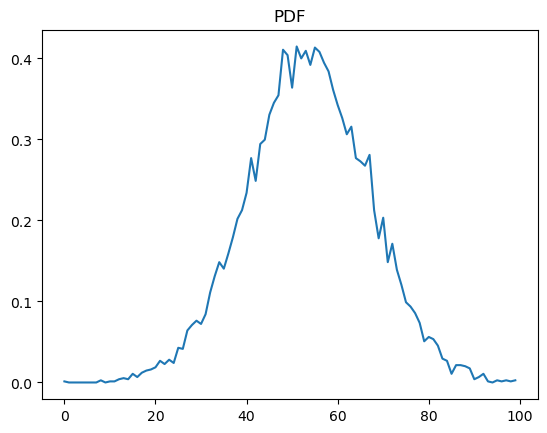

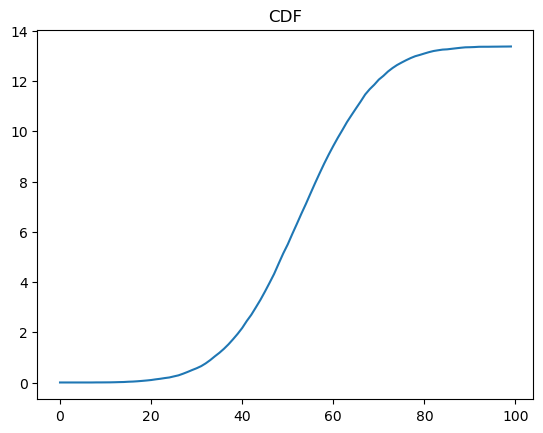

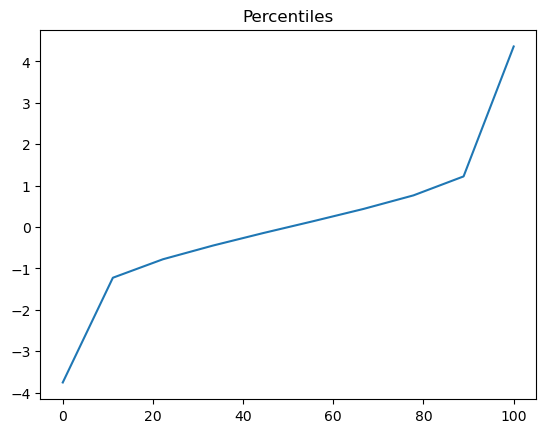

In [39]:
# Calculate the percentiles
percentiles = np.linspace(0, 100, 10)

# Plot the PDF
plt.plot(pdf)
plt.title("PDF")
plt.show()

# Plot the CDF
plt.plot(cdf)
plt.title("CDF")
plt.show()

# Plot the percentiles
plt.plot(percentiles, np.percentile(samples, percentiles))
plt.title("Percentiles")
plt.show()

In [40]:
lower_quartile = stats.norm().ppf(25/100)
lower_quartile # -0.674

-0.6744897501960817

#### 6.1.2.1 Desviación estándar y varianza

In [2]:
data = np.arange(7,14)
data

array([ 7,  8,  9, 10, 11, 12, 13])

In [3]:
np.std(data, ddof=0) # Desviación estándar de la población

2.0

In [4]:
np.std(data, ddof=1) # Desviación estándar de la muestra, típicamente usado

2.160246899469287

In [5]:
df = pd.DataFrame(data)
df

,0
0,7
1,8
2,9
3,10
4,11
5,12
6,13


In [6]:
std = df.std() # Devuelve una Serie pandas
std # Usa 1 gl por defecto

0    2.160247
dtype: float64

In [7]:
std.values # El correspondiente array numpy 

array([2.1602469])

#### c) Error Estándar

#### d) Intervalos de Confianza

In [8]:
import scipy.stats as stats
stats.norm.ppf(0.025)

-1.9599639845400545

In [9]:
stats.norm.ppf((1-0.025))

1.959963984540054

### 6.1.3 Parámetros que describen la forma de una distribución

#### a) Ubicación

#### b) Escala

#### c) Parámetros de forma

### 6.1.4 Métodos importantes de funciones de densidad de probabilidad

In [10]:
import numpy as np
from scipy import stats

In [11]:
my_dist = stats.norm(5,3) # Crear distribución congelada

In [12]:
x = np.linspace(-5, 15, 101)
y = my_dist.cdf(x) # Calcular la CFD correspondiente

In [13]:
df = pd.DataFrame({
    'x':x,
    'CDF':y
})

df

,x,CDF
0,-5.0,0.000429
1,-4.8,0.000544
2,-4.6,0.000687
3,-4.4,0.000864
4,-4.2,0.001082
...,...,...
96,14.2,0.998918
97,14.4,0.999136
98,14.6,0.999313
99,14.8,0.999456


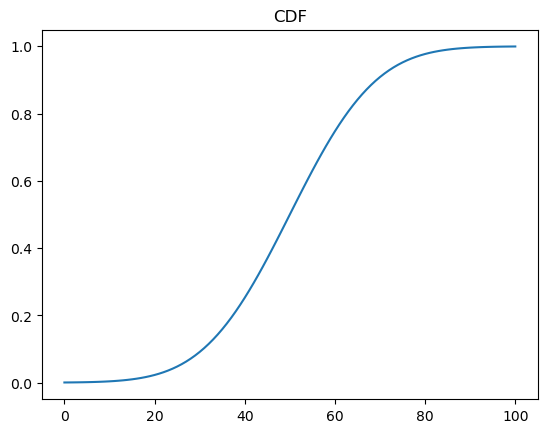

In [18]:
import matplotlib.pyplot as plt
# Plot the CDF
plt.plot(df['CDF'],data=df)
plt.title("CDF")
plt.show()

## 6.2 Distribuciones discretas

### 6.2.1 Distribución de Bernoulli 

In [19]:
from scipy import stats
p = 0.5
bernoulli_dist = stats.bernoulli(p)
bernoulli_dist

In [20]:
p_tails = bernoulli_dist.pmf(0)
p_heads = bernoulli_dist.pmf(1)

In [21]:
p_tails

0.5

In [22]:
p_heads

0.5

In [23]:
trials = bernoulli_dist.rvs(10)
trials

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

### 6.2.2 Distribución Binomial

In [24]:
from scipy import stats
import numpy as np

In [26]:
num = 4
p = 0.5 # Lanzar moneda
binomial_dist = stats.binom(num, p)
binomial_dist

In [27]:
binomial_dist.pmf(np.arange(5))
# Probabilidad de que nunca salga cara | de que salga 1 vez | ....

array([0.0625, 0.25  , 0.375 , 0.25  , 0.0625])

In [29]:
sum_binomial = 0
for i in range(5):
    sum_binomial += binomial_dist.pmf(np.arange(5))[i]
print(sum_binomial)

1.0


In [30]:
from scipy import stats
p = stats.binomtest(51, n = 235, p = 1/6)
p

BinomTestResult(k=51, n=235, alternative='two-sided', statistic=0.2170212765957447, pvalue=0.043747970182399856)

### 6.2.3 Distribución de Poisson 

### 6.2.4 Distribución Hipergeométrica

## 6.3 Distribución Normal 

In [1]:
import numpy as pd
from scipy import stats

In [2]:
mu = -2
sigma = 0.7
my_dist = stats.norm(mu,sigma)
alpha = 0.05

In [3]:
my_dist.interval(1-alpha)

(-3.371974789178038, -0.6280252108219622)

### 6.3.1 Ejemplos de distribuciones normales

### 6.3.2 Teorema Central del Límite 

### 6.3.3 Distribuciones y Tests de Hipétesis

In [4]:
from scipy import stats

In [5]:
nd = stats.norm(3.5, 0.76)

In [6]:
nd.cdf(2.6)

0.11816486815719918

## 6.4 Distribuciones Continuas Derivadas de la Distribución Normal

### 6.4.1 Distribución T

In [7]:
import numpy as np
from scipy import stats

In [8]:
n = 20
df = n - 1
alpha = 0.05

In [9]:
stats.t(df).isf(alpha/2)

2.0930240544082634

In [11]:
stats.norm.isf(alpha/2)

1.9599639845400545

In [20]:
# df = len(data) - 1
# ci = stats.t.interval(1-alpha, df, loc = np.mean(data), scale = stats.sem(data))
# ci

### 6.4.2 Distribución Chi-Cuadrado

In [21]:
import numpy as np
from scipy import stats

In [22]:
data = [3.04, 2.94, 3.01, 3.00, 2.94, 2.91, 3.02,
        3.04, 3.09, 2.95, 2.99, 3.10, 3.02]

In [23]:
sigma = 0.05
chi2Dist = stats.chi2(len(data) - 1)
statistic = sum(((data - np.mean(data))/sigma)**2)

In [24]:
chi2Dist.sf(statistic)

0.19293306654285156

### 6.4.3 Distribución F

In [25]:
import numpy as np
from scipy import stats

In [26]:
old = [29.7, 29.4, 30.1, 28.6, 28.8, 30.2, 28.7, 29.]
new = [30.7, 30.3, 30.3, 30.3, 30.7, 29.9, 
       29.9, 29.9, 30.3, 30.3, 29.7, 30.3]

In [27]:
f_val = np.var(new,ddof=1)/np.var(old,ddof=1) 
f_val

0.24393467384121667

In [28]:
fd = stats.f(len(new)-1, len(old)-1)
fd

In [30]:
p = fd.cdf(f_val)
p

0.018665169931411433

In [39]:
if (0.025 < p <0.975):
    print('Sin diferencia significativa.')
else:
    print('Hay una diferencia significativa entre las dos\n'
    'distribuciones.')

Hay una diferencia significativa entre las dos
distribuciones.


## 6.5 Otras distribuciones continuas

### 6.5.1 Distribución Lognormal

### 6.5.2 Distribución Weibull

### 6.5.3 Distribución exponencial

### 6.5.4 Distribución Uniforme

## 6.6 Intervalos de confianza de parámetros estadísticos seleccionados

In [41]:
import ISP_confidence_intervals as ci

In [42]:
# Establecer datos y parámetros
data = [89, 104.1, 92.3, 106.2, 96.3, 107.8, 102.5]
n_obs = 1  # para
n_tot = 20 # Binomial
n_expected = 12 # para Poisson

In [43]:
# Calculo los IC
ci_mean = ci.mean(data, ci_type='lower')
ci_mean

array([94.4140034])

In [47]:
ci_s = ci.sigma(data, ci_type='upper')
ci_s

array([13.89746618])

In [48]:
ci_bin = ci.binomial(n_obs, n_tot, ci_type='two-sided')
ci_bin

array([0.00126509, 0.24873276])

In [46]:
ci_poisson = ci.poisson(n_expected, alpha=0.05)
print(f'IC-límite(s) para la media de Poisson:\n{ci_poisson}')

IC-límite(s) para la media de Poisson:
[ 6.20057511 20.96158505]


## 6.7 Ejercicios

# Capítulo 7. Tests de Hipótesis

## 7.1 Procedimiento de análisis típico

### 7.1.1 Selección de datos y valores atípicos

### 7.1.2 Comprobación de normalidad

#### a) Gráficos de probabilidad

In [1]:
# stats.probplot(data, plot=plt)
# pg.qqplot(data, plot=plt)

In [3]:
from scipy import stats
stats.norm().ppf(0.02)

-2.053748910631823

#### b) Pruebas de Normalidad

### 7.1.3 Transformación

## 7.2 Pruebas de hipótesis y análisis de potencia

### 7.2.1 Un ejemplo

In [5]:
import numpy as np
weights = np.array([109.4, 76.2, 128.7, 93.7, 85.6,
                    117.7, 117.2, 87.3, 100.3, 55.1])

In [6]:
t_val = (110 - np.mean(weights)) / stats.sem(weights)
t_val

1.836024999781543

In [7]:
td = stats.t(len(weights - 1))
td

In [9]:
p = 2 * td.sf(t_val)
p

0.0962226855357113

### 7.2.2 Generalización y Aplicaciones

#### a) Pasos del análisis

#### b) Ejemplos Adicionales

### 7.2.3 La interpretación del valor P

Un valor de p < 0,05 para la hipótesis nula debe interpretarse de la siguiente manera:

Si la hipótesis nula es verdadera, la probabilidad de encontrar un estadístico de prueba tan extremo o más extremo que el observado es inferior al 5 %.

¡Esto no es lo mismo que decir que la hipótesis nula es falsa, y menos aún, que una hipótesis alternativa es verdadera!

### 7.2.4 Tipos de Errores

#### a) Errores Tipo I

#### b) Errores de tipo II y potencia de prueba

#### c) Errores en la interpretación de los valores P

### 7.2.5 Tamaño de la muestra

#### a) Ejemplos de análisis de potencia

#### b) Python Solutions

In [11]:
from statsmodels.stats import power
nobs = power.tt_ind_solve_power(effect_size = 0.5, 
                               alpha = 0.05,
                               power = 0.8)
nobs

C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


63.76561058785404

In [12]:
print(np.ceil(nobs))

64.0


In [13]:
effect_size = power.tt_ind_solve_power(alpha = .05,
                                      power = .8,
                                      nobs1 = 25)
np.round(effect_size,2)

0.81

#### c) Programas: Tamaño de la muestra

## 7.3 Sensibilidad y especificidad

### 7.3.1 Cálculos relacionados

### 7.3.2 Ejemplo: Mamografía

## 7.4 Curva característica de funcionamiento del receptor (ROC)

## 7.5 Ejercicios

# Capítulo 8. Pruebas de medias de datos numéricos

## 8.1 Distribución de una media muestral

### 8.1.1 Prueba T de una muestra para un valor medio